In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pandaimage/panda.jpg


  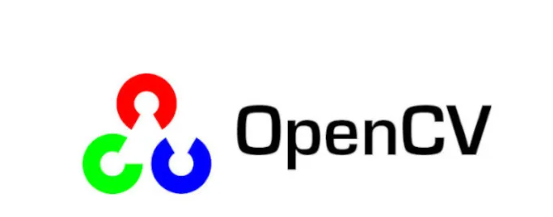

## Requirement libraries


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
def pandaImageShow(image_title, image):
    image_varible = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize = (4,2))
    plt.imshow(image_varible)
    plt.title(image_title)
    plt.show()
    

# Morphological image processing
Morphological image processing is a collection of non-linear operations related to the shape or morphology of features in an image. According to Wikipedia, morphological operations rely only on the relative ordering of pixel values, not on their numerical values,and therefore are especially suited to the processing of binary images. Morphological operations can also be applied to greyscale images such that their light transfer functions are unknown and therefore their absolute pixel values are of no or minor interest.

Morphological techniques probe an image with a small shape or template called a structuring element. The structuring element is positioned at all possible locations in the image and it is compared with the corresponding neighborhood of pixels. Some operations test whether the element "fits" within the neighborhood, while others test whether it "hits" or intersects the neighborhood:

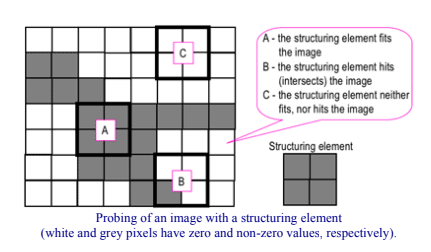

A morphological operation on a binary image creates a new binary image in which the pixel has a non-zero value only if the test is successful at that location in the input image.

## Why do I need padding?
Padding is added to the edges of the image before performing convolution to ensure that the output feature map has the same spatial dimensions as the input image. 
To perform convolution on an image, the kernel is placed on each pixel of the image in a sliding window fashion. At each position, the corresponding pixels of the image and the kernel are multiplied together, and the resulting products are summed up to produce a single output value.

However, when the kernel is placed at the edges of the image, there may not be enough pixels in the image to multiply with the kernel values. This can result in a smaller output feature map than the input image, as the kernel cannot be placed on the edge pixels of the image.

By adding padding to the input image, we ensure that the kernel always overlaps with the pixels of the image, even at the edges, and produces an output feature map with the same spatial dimensions as the input image

In [4]:
def convolution(image, kernel):
    imageHeight, imageWidth = image.shape[:2]
    kernelHeight, kernelWidth = kernel.shape[:2]
    
    padding = (kernelWidth - 1) // 2 #for special kernel we will minus one column
    
    #Create image copy
    # This copyMakeBorder() function adds a border of padding pixels around the input image matrix by reflecting the pixels along the border. 
    #This is done to ensure that the convolution operation is performed correctly at the edges of the image.
    image = cv.copyMakeBorder(image,
                             padding, padding,
                             padding, padding,
                             cv.BORDER_REFLECT
                             )
   # output_mask = np.zeros((imageHeight, imageWidth), dtpye = "float32")
    output_mask = np.zeros((imageHeight, imageWidth), dtype= "float32")
    
    #to move next pixel simultaneously & here actually convolution done
    for y in np.arange(padding, imageHeight + padding):
        for x in np.arange(padding, imageWidth + padding):
            region_of_interest = image[y - padding:y + padding + 1,
                                      x - padding:x + padding + 1]
            new_kernel = (region_of_interest * kernel).sum()
            output_mask[y - padding, x - padding] = new_kernel
        
    output_mask = rescale_intensity(output_mask, in_range = (0, 255))
    output_mask = (output_mask * 255).astype("uint8")
    
    return output_mask

In [5]:
image_argument = {"image":"../input/pandaimage/panda.jpg"}

## Blur Image

In this case, we want to create a kernel that is filled with the value 1, so we use the np.ones() function to create an array of ones.

By dividing each element of the kernel by the total number of elements in the kernel (i.e., the width times the height), we ensure that the sum of all the pixel values in the kernel is equal to 1. This is important because it preserves the overall intensity of the image when the kernel is applied using the convolution operation. Without this normalization step, the output image would have a different overall intensity than the input image, which would be undesirable.

In [6]:
#blur image and scaling image & as we want to flaot value so we use "/" 
image_small_blur = np.ones((7, 7), dtype = "float") * (1.0 / (7 * 7))
image_large_blur = np.ones((21,21), dtype = "float") * (1.0 / (21 * 21))

In [7]:
image_large_blur

array([[0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757],
       [0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
        0.00226757, 0.00226757, 0.00226757, 0.0022675

In [8]:
image_small_blur

array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816],
       [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
        0.02040816, 0.02040816]])

## Sharpen Image
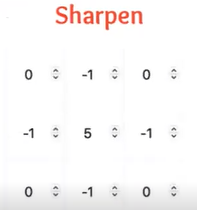

In [9]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]], dtype = "int")

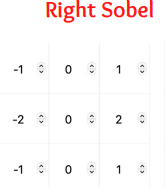

In [10]:
right_sobel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype = "int")

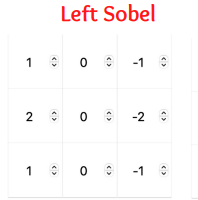

In [11]:
left_sobel = np.array([[1, 0, -1],
                       [2, 0, 2],
                      [1, 0, -1]], dtype = "int")

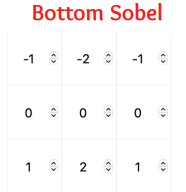

In [12]:
bottom_sobel = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]], dtype = "int" )

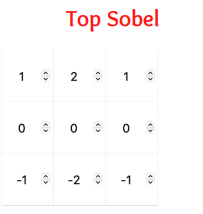

In [13]:
top_sobel = np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]], dtype = "int")

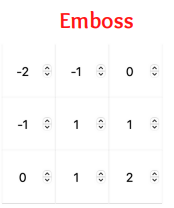

In [14]:
emboss = np.array([[-2, -1 ,0],
                  [-1, 1, 1],
                  [0, 1, 2]], dtype = "int")

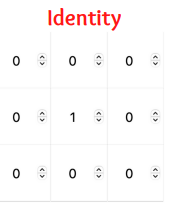


In [15]:
identity = np.array([[0, 0 ,0],
                  [0, 1, 0],
                  [0, 0, 0]], dtype = "int")

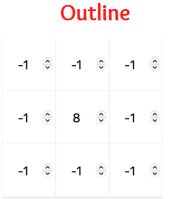

In [16]:
outline = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]], dtype = "int")

In [17]:
image  = cv.imread(image_argument["image"])
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [18]:
print("Image Information {}".format(image.shape))
print("\nImage Information {}".format(gray_image.shape))

Image Information (1688, 3000, 3)

Image Information (1688, 3000)


In [19]:
convolution_sharpen_image = convolution(image, sharpen)
convolution_left_sobel_image = convolution(image, left_sobel)
convolution_right_sobel_image = convolution(image, right_sobel)
convolution_bottom_sobel_image = convolution(image, bottom_sobel)
convolution_top_sobel_image = convolution(image, top_sobel)
convolution_emboss_image = convolution(image, emboss)
convolution_identity_image = convolution(image, identity)
convolution_outline_image = convolution(image, outline)

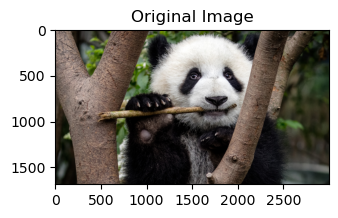

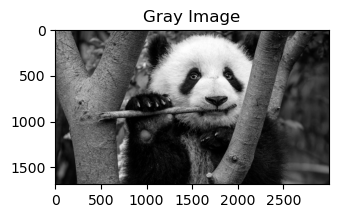

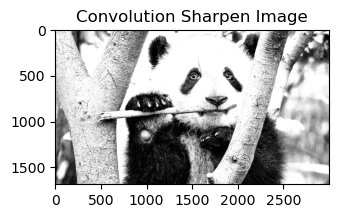

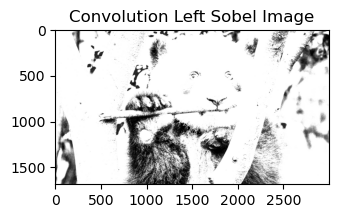

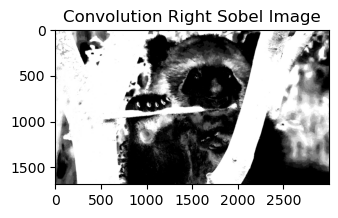

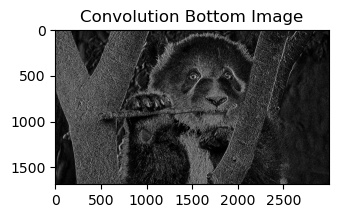

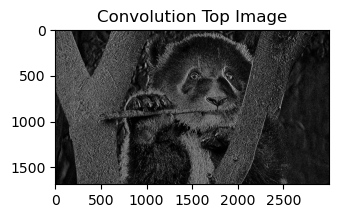

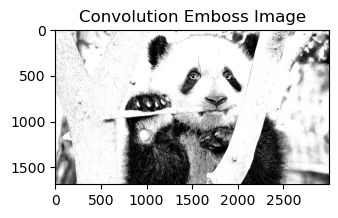

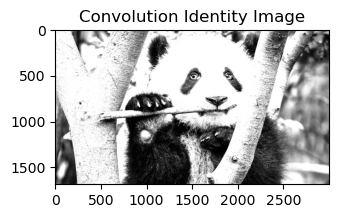

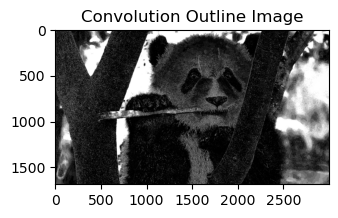

In [20]:
pandaImageShow("Original Image", image)
pandaImageShow("Gray Image", gray_image)
pandaImageShow("Convolution Sharpen Image", convolution_sharpen_image)
pandaImageShow("Convolution Left Sobel Image", convolution_left_sobel_image)
pandaImageShow("Convolution Right Sobel Image", convolution_right_sobel_image)
pandaImageShow("Convolution Bottom Image", convolution_bottom_sobel_image)
pandaImageShow("Convolution Top Image", convolution_top_sobel_image)
pandaImageShow("Convolution Emboss Image", convolution_emboss_image)
pandaImageShow("Convolution Identity Image", convolution_identity_image)
pandaImageShow("Convolution Outline Image", convolution_outline_image)

## Filtering on Image

In [21]:
filter_on_sharpen_image = cv.filter2D(gray_image, -1, sharpen)
filter_on_left_sobel_image = cv.filter2D(gray_image, -1, left_sobel)
filter_on_right_sobel_image = cv.filter2D(gray_image, -1, right_sobel)
filter_on_bottom_sobel_image = cv.filter2D(gray_image, -1, bottom_sobel)
filter_on_top_sobel_image = cv.filter2D(gray_image, -1, top_sobel)
filter_on_emboss_image = cv.filter2D(gray_image, -1, emboss)
filter_on_identity_image = cv.filter2D(gray_image, -1, identity)
filter_on_outline_image = cv.filter2D(gray_image, -1, outline)

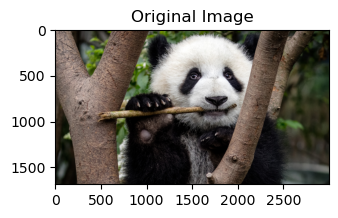

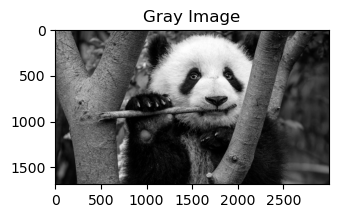

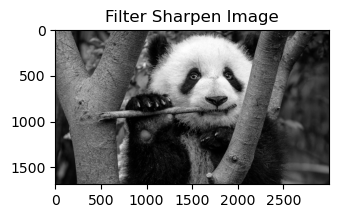

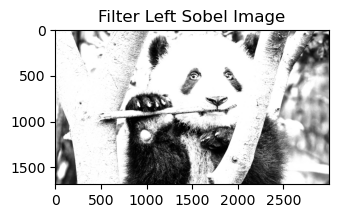

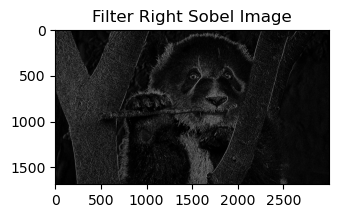

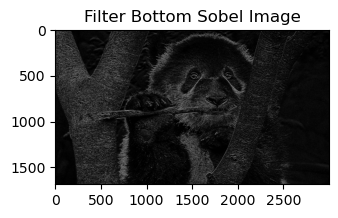

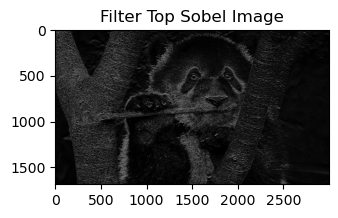

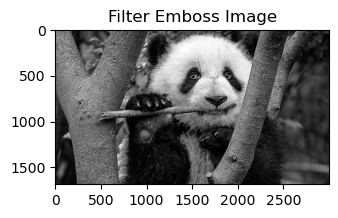

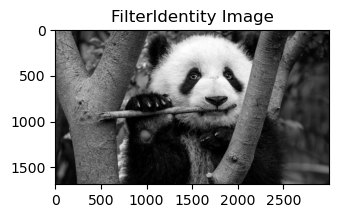

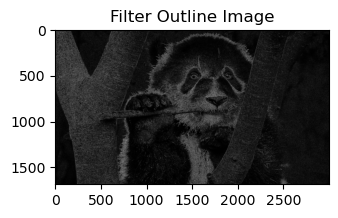

In [22]:
pandaImageShow("Original Image", image)
pandaImageShow("Gray Image", gray_image)
pandaImageShow("Filter Sharpen Image", filter_on_sharpen_image)
pandaImageShow("Filter Left Sobel Image",filter_on_left_sobel_image)
pandaImageShow("Filter Right Sobel Image", filter_on_right_sobel_image)
pandaImageShow("Filter Bottom Sobel Image", filter_on_bottom_sobel_image)
pandaImageShow("Filter Top Sobel Image", filter_on_top_sobel_image)
pandaImageShow("Filter Emboss Image", filter_on_emboss_image)
pandaImageShow("FilterIdentity Image", filter_on_identity_image)
pandaImageShow("Filter Outline Image", filter_on_outline_image)

In [23]:
filter_on_sharpen_image = cv.filter2D(gray_image, -8, sharpen)
filter_on_left_sobel_image = cv.filter2D(gray_image, -8, left_sobel)
filter_on_right_sobel_image = cv.filter2D(gray_image, -8, right_sobel)
filter_on_bottom_sobel_image = cv.filter2D(gray_image, -8, bottom_sobel)
filter_on_top_sobel_image = cv.filter2D(gray_image, -8, top_sobel)
filter_on_emboss_image = cv.filter2D(gray_image, -8, emboss)
filter_on_identity_image = cv.filter2D(gray_image, -8, identity)
filter_on_outline_image = cv.filter2D(gray_image, -8, outline)

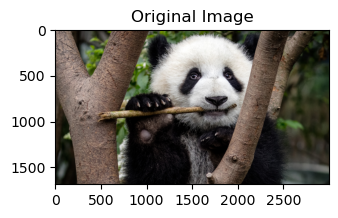

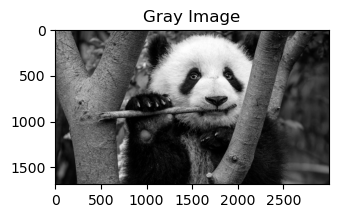

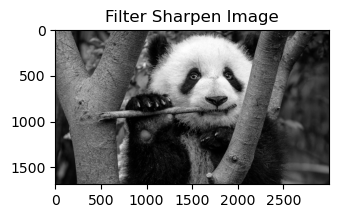

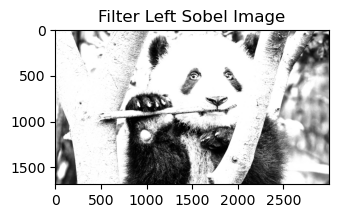

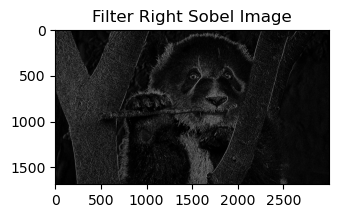

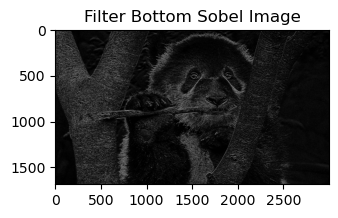

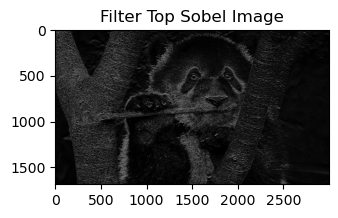

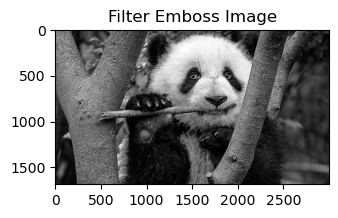

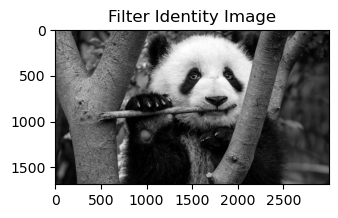

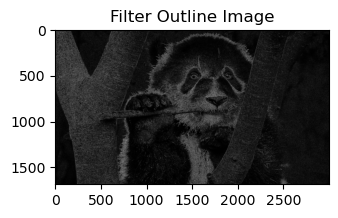

In [24]:
pandaImageShow("Original Image", image)
pandaImageShow("Gray Image", gray_image)
pandaImageShow("Filter Sharpen Image", filter_on_sharpen_image)
pandaImageShow("Filter Left Sobel Image",filter_on_left_sobel_image)
pandaImageShow("Filter Right Sobel Image", filter_on_right_sobel_image)
pandaImageShow("Filter Bottom Sobel Image", filter_on_bottom_sobel_image)
pandaImageShow("Filter Top Sobel Image", filter_on_top_sobel_image)
pandaImageShow("Filter Emboss Image", filter_on_emboss_image)
pandaImageShow("Filter Identity Image", filter_on_identity_image)
pandaImageShow("Filter Outline Image", filter_on_outline_image)

## Image Annotations

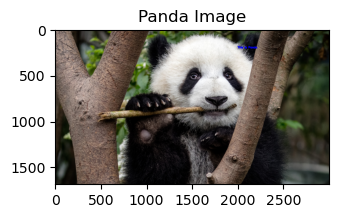

Text(0.5, 1.0, 'Image of Panda')

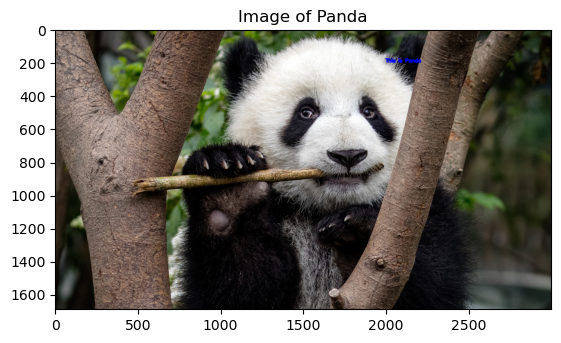

In [25]:
image_text = image.copy()
text_on_image = "This is Panda"
image_coordinate = (2000, 200)
cv.putText(image_text, text_on_image, image_coordinate, fontFace = cv.FONT_HERSHEY_SIMPLEX,
          fontScale = 1.0, thickness = 5, color = (255, 0, 0))
pandaImageShow("Panda Image", image_text)
#cv.waitKey(0)
#cv.destroyWindow("Panda Image")

image = cv.cvtColor(image_text, cv.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Panda")


## Draw Rectangle

Text(0.5, 1.0, 'Image of Panda')

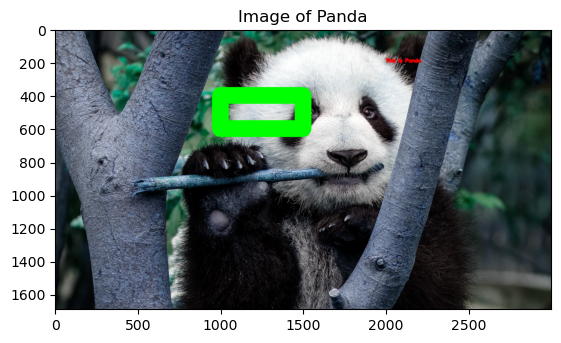

In [26]:
image_text = image.copy()
image_coordinate_1 = (1000, 400)
image_coordinate_2 = (1500, 600)
cv.rectangle(image_text, image_coordinate_1, image_coordinate_2,
             thickness = 100, color = (0, 255, 0))
image = cv.cvtColor(image_text, cv.COLOR_BGR2RGB)
plt.subplot(111)
plt.imshow(image)
plt.title("Image of Panda")

# Image Morphology

##  Morphological Operations

In morphism, we find the shape and size or structure of an object. Both operations are
defined for binary images, but we can also use them on a grayscale image. These are widely used in the following way:
* • Removing Noise
* • Identify intensity bumps or holes in the picture.
* • Isolation of individual elements and joining disparate elements in the image.

**Morphological operations based on OpenCV are as follows:**

1. Erosion

2. Dilation

3. Opening

4. Closing

5. Morphological Gradient

6. Top hat

7. Black hat

For all the above techniques the two important requirements are the binary image and a kernel structuring element that is used to slide across the image.


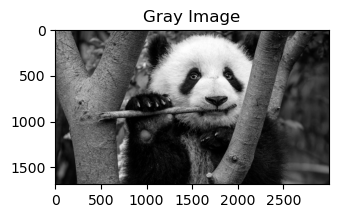

In [27]:
image = cv.imread(image_argument["image"])
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
pandaImageShow("Gray Image", gray_image)

### Image Erosion

Just like water rushing along a river bank erodes the soil, an erosion in an image “erodes” the foreground object and makes it smaller. Simply put, pixels near the boundary of an object in an image will be discarded, “eroding” it away. Erosion works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image. A foreground pixel in the input image will be kept only if all pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e., background).
Erosion is useful for removing small blobs in an image or disconnecting two connected objects.

Erosion can be useful for tasks such as noise reduction, feature extraction, and segmentation.

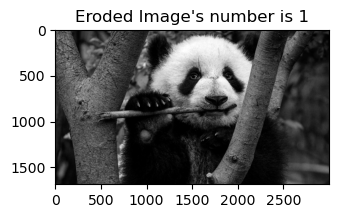

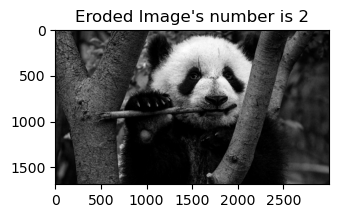

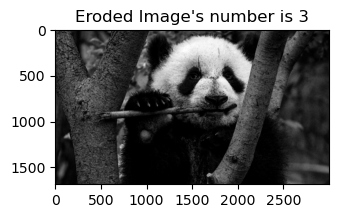

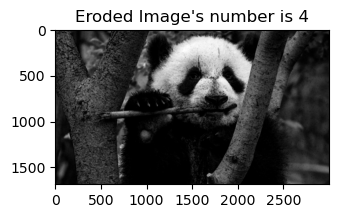

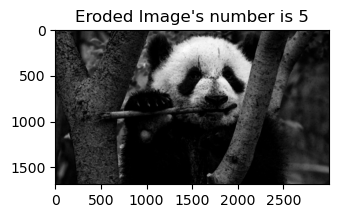

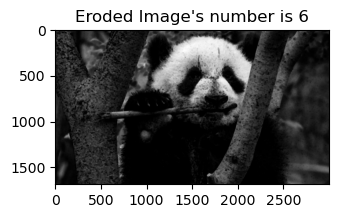

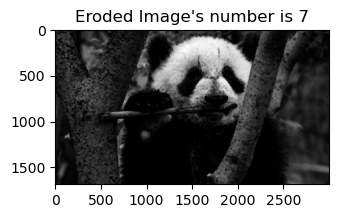

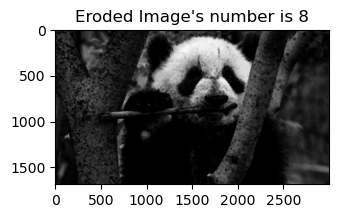

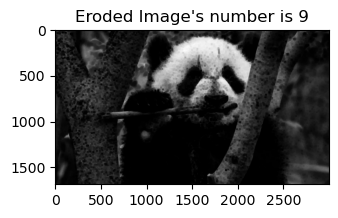

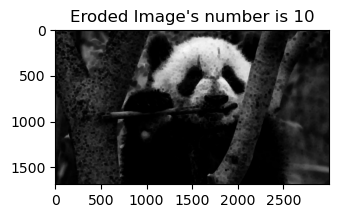

In [28]:
for i in range(0, 10):
    eroded_image = cv.erode(gray_image, None, iterations = i + 1) #None specifies the structuring element used for erosion. If None is passed, a 3x3 rectangular structuring element will be used by default.
    pandaImageShow("Eroded Image's number is {}".format(i + 1), eroded_image)

### Dilation Image

**Dilation is a technique where we expand the image. It adds the number of pixels to the
boundaries of objects in an image. The structuring element controls it. The structuring
element is a matrix of 1's and 0's.**

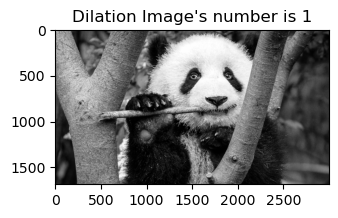

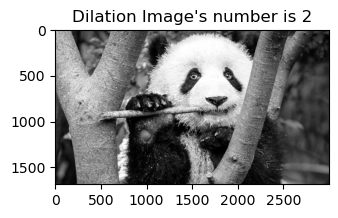

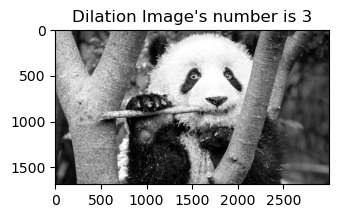

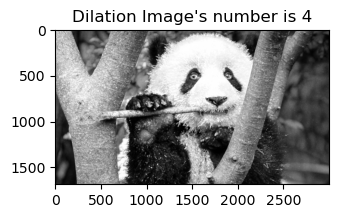

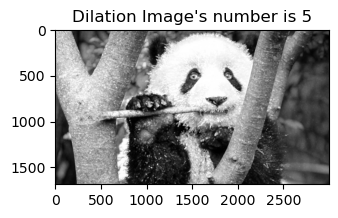

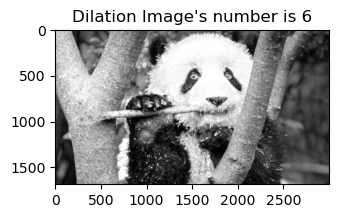

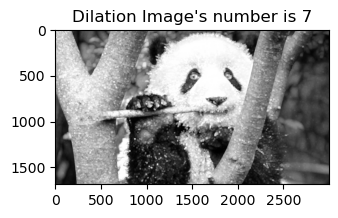

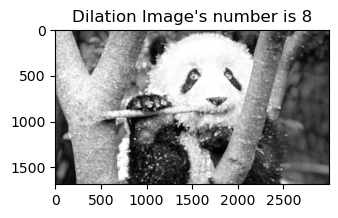

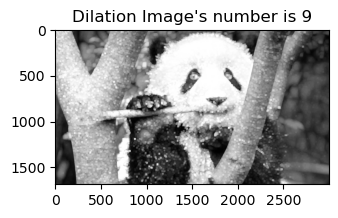

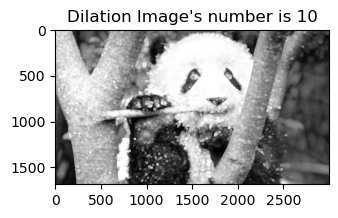

In [29]:
for i in range(0, 10):
    dilated_image = cv.dilate(gray_image, None, iterations = i + 1) #None specifies the structuring element used for erosion. If None is passed, a 3x3 rectangular structuring element will be used by default.
    pandaImageShow("Dilation Image's number is {}".format(i + 1), dilated_image)

## **Opening**

An opening is an erosion followed by a dilation.
Performing an opening operation allows us to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

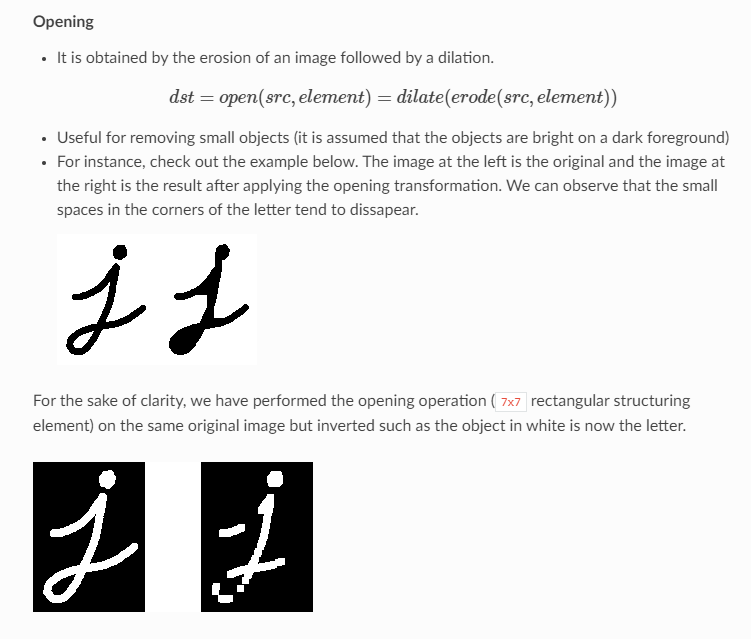

**Structuring Element**
The size and shape of the structuring element define how many numbers of the pixel should be added or removed from the objects in an image. It is a matrix of 1's and 0's. The center pixel of the image is called the origin.

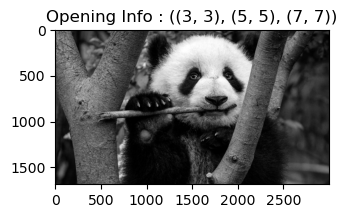

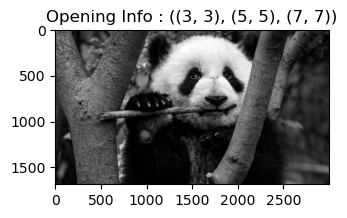

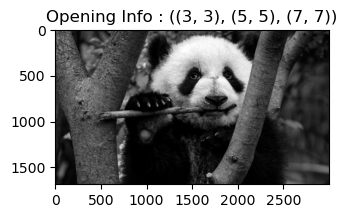

In [35]:
image = cv.imread(image_argument["image"])
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]
for i in kernelSize:
    kernel = cv.getStructuringElement(cv.MORPH_RECT, i)
    morphology = cv.morphologyEx(image_gray, cv.MORPH_OPEN, kernel)
    pandaImageShow("Opening Info : ({}, {}, {})".format(kernelSize[0], kernelSize[1], kernelSize[2]), morphology)

## **Closing**
The exact opposite to an opening would be a closing. A closing is a dilation followed by an erosion. As the name suggests, a closing is used to close holes inside of objects or for connecting components together.
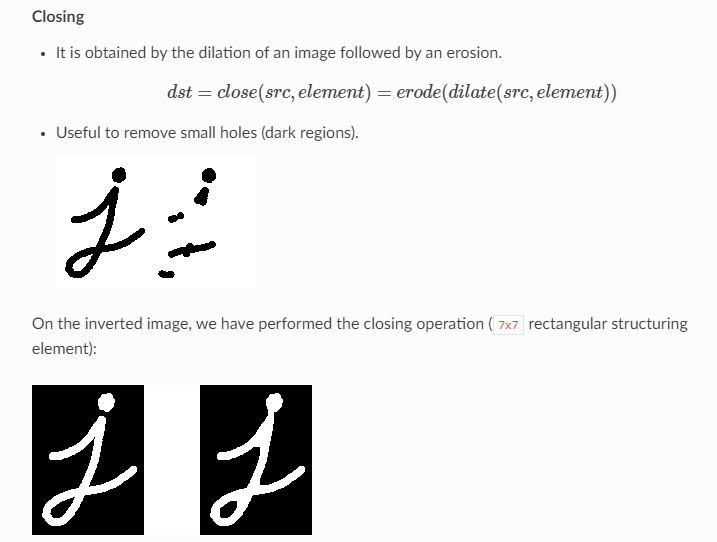

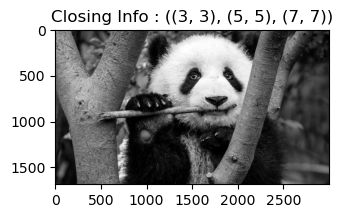

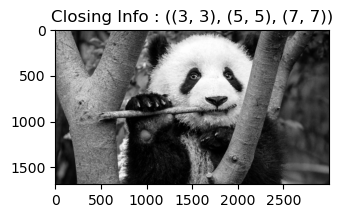

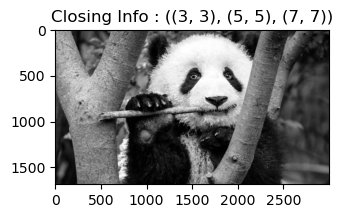

In [36]:
image = cv.imread(image_argument["image"])
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]
for i in kernelSize:
    kernel = cv.getStructuringElement(cv.MORPH_RECT, i)
    morphology = cv.morphologyEx(image_gray, cv.MORPH_CLOSE, kernel)
    pandaImageShow("Closing Info : ({}, {}, {})".format(kernelSize[0], kernelSize[1], kernelSize[2]), morphology)

## **Morphological Gradient**

The morphological gradient is useful to detect the outline of an object. It can be used for edge detection. Basically, it is the difference between a dilation and an erosion operation.

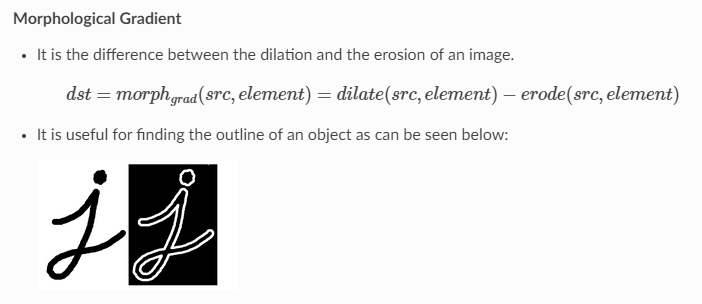

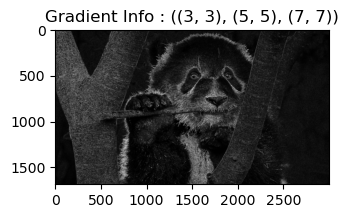

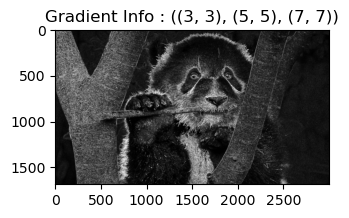

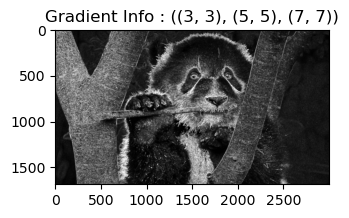

In [37]:
image = cv.imread(image_argument["image"])
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]
for i in kernelSize:
    kernel = cv.getStructuringElement(cv.MORPH_RECT, i)
    morphology = cv.morphologyEx(image_gray, cv.MORPH_GRADIENT, kernel)
    pandaImageShow("Gradient Info : ({}, {}, {})".format(kernelSize[0], kernelSize[1], kernelSize[2]), morphology)

## **Top hat/white hat and black hat**

A top hat (also known as a white hat) morphological operation is the difference between the original (grayscale/single channel) input image and the opening.
A top hat operation is used to reveal bright regions of an image on dark backgrounds.

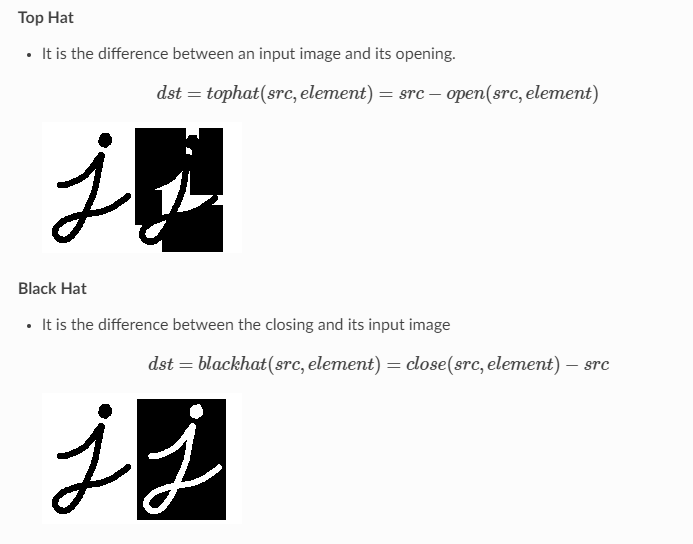

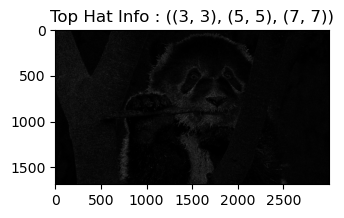

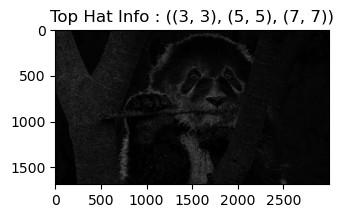

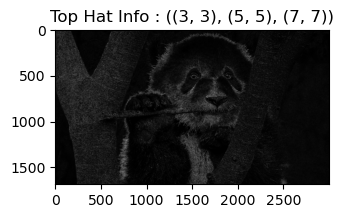

In [38]:
image = cv.imread(image_argument["image"])
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]
for i in kernelSize:
    kernel = cv.getStructuringElement(cv.MORPH_RECT, i)
    morphology = cv.morphologyEx(image_gray, cv.MORPH_TOPHAT, kernel)
    pandaImageShow("Top Hat Info : ({}, {}, {})".format(kernelSize[0], kernelSize[1], kernelSize[2]), morphology)

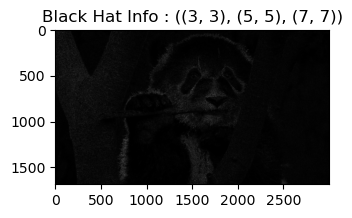

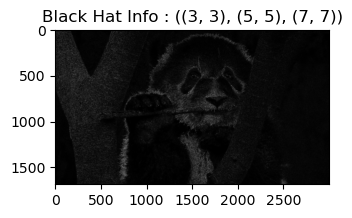

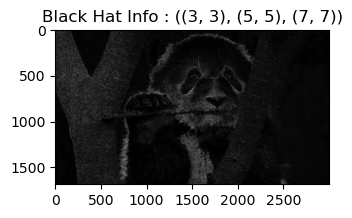

In [41]:
image = cv.imread(image_argument["image"])
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
kernelSize = [(3, 3),
             (5, 5), 
              (7, 7)]
for i in kernelSize:
    kernel = cv.getStructuringElement(cv.MORPH_RECT, i)
    morphology = cv.morphologyEx(image_gray, cv.MORPH_BLACKHAT, kernel)
    pandaImageShow("Black Hat Info : ({}, {}, {})".format(kernelSize[0], kernelSize[1], kernelSize[2]), morphology)